## Brain Volume, Mental State Examination, and Education Attainment as Possible Diagnostic Predictors for Alzheimer's Disease


### Introduction

Dementia is a chronic condition associated with aging and brain atrophy. It consists of widespread neuropsychological deficits that hinders daily activities. Our project focuses on Alzheimer's disease, the most common form of dementia. Unfortunately, Alzheimer’s has neither definitive diagnosis nor cure. Thus, our exploratory analysis aims to identify predictors to help with the early detection and prevention of Alzheimer's disease.

Specifically, we want to see whether brain volume measures, mini-mental state examination score, and education attainment can predict an individual’s dementia state within a chosen dataset.

We will use the longitudinal tabular dataset “Dementia Classification: Compare Classifiers” from Kaggle.com, with the pathway “oasis_longitudinal.csv”. This dataset consists of 15 variables and 373 rows, sampling from 150 participants of age 60-96. It examines the patterns in whether participants have dementia or not. This table includes description of the variables:

<img src=https://raw.githubusercontent.com/churancc/Dementia_Project/main/Table%20column%20descriptors.png width="500">


### Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(purrr)
set.seed(999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
url <- "https://raw.githubusercontent.com/churancc/Dementia_Project/main/oasis_longitudinal.csv"

dementia_df <- read_csv(url)
colnames(dementia_df)[6] <- "Sex"

head(dementia_df) # Preview data set
tail(dementia_df)

Rows: 373 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Subject ID, MRI ID, Group, M/F, Hand
dbl (10): Visit, MR Delay, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0.0,1215,0.710,1.444


Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1,28,0.5,1704,0.711,1.030
OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1,28,0.5,1693,0.694,1.037
OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1,26,0.5,1688,0.675,1.040
OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2,30,0.0,1319,0.801,1.331
OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2,30,0.0,1327,0.796,1.323
OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2,30,0.0,1333,0.801,1.317


In [3]:
dementia <- dementia_df |>
    mutate(across(c("Group", "Sex", "Hand", "SES", "CDR"), as_factor))
 head(dementia) # Preview data set

Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0,1215,0.710,1.444


In [4]:
unique_names <- make.names(names(dementia), unique = TRUE)
colnames(dementia) <- unique_names

head(dementia) # Preview data set

Subject.ID,MRI.ID,Group,Visit,MR.Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0,1215,0.710,1.444


In [5]:
dementia_filter <- dementia |>
            filter(Group != "Converted") 

head(dementia) # Preview data set
tail(dementia)

Subject.ID,MRI.ID,Group,Visit,MR.Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NA,23,0.5,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NA,28,0.5,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NA,22,0.5,1698,0.701,1.034
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0,1215,0.710,1.444


Subject.ID,MRI.ID,Group,Visit,MR.Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1,28,0.5,1704,0.711,1.030
OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1,28,0.5,1693,0.694,1.037
OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1,26,0.5,1688,0.675,1.040
OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2,30,0,1319,0.801,1.331
OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2,30,0,1327,0.796,1.323
OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2,30,0,1333,0.801,1.317


Since SES column contain missing values (NA) and that it cannot be used as a potential continuous variable predictor (i.e., SES is categorical), SES will be removed during data tidying. Another categorical variable CDR is also selected out of the data.

Group 'Converted' represents initially non-demented patients whose MRI scan results characterized them as demented on a subsequent visit. Since this group does not serve the purpose of our analysis on predicting patient class as demented or non-demented, group 'Converted' is filtered out.

Since all participants are right-handed, column 'Hand' is also removed.

Here is a tidied version of the data set:

In [6]:
dementia <- dementia |>
select(-SES, -CDR) |>
filter(Group %in% c("Nondemented", "Demented")) |>
select(-Hand)

head(dementia)

Subject.ID,MRI.ID,Group,Visit,MR.Delay,Sex,Age,EDUC,MMSE,eTIV,nWBV,ASF
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,27,1987,0.696,0.883
OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,30,2004,0.681,0.876
OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,23,1678,0.736,1.046
OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,28,1738,0.713,1.010
OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,22,1698,0.701,1.034
OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,88,18,28,1215,0.710,1.444


- **First table**: Throughout this longitudinal study (n = 150), each subject received a new brain MRI scan that determines their diagnostic label of dementia for every one to three visits.

  - The table below shows that throughout the entire study, 72 subjects remained non-demented since their fitst visit, 64 subjects were demented on their first visit maintained the same diagnosis for later scans. Meanwhile, 14 subjects who were not characterized by dementia later converted as demented at a subsequent visit.

In [7]:
class_table <- dementia |>
                    group_by(Subject.ID, Group) |>
                    summarize(Count = n()) |>

                    group_by(Group) |>
                    summarize(Count = n())

class_table

`summarise()` has grouped output by 'Subject.ID'. You can override using the
`.groups` argument.


Group,Count
<fct>,<int>
Nondemented,72
Demented,64


- **Second table**:  
  - Means of the predictor variables that may be used in the analysis. Chosen variables: EDUC, MMSE, nWBV.

In [8]:
predictor_mean_table <- dementia |>
select(EDUC, MMSE, nWBV)|>
map_df(mean, na.rm = TRUE)

predictor_mean_table

EDUC,MMSE,nWBV
<dbl>,<dbl>,<dbl>
14.50298,27.19461,0.7302113


### Box-plot Visualizations for Potential Predictors

With the dark bolded horizontal line in boxplot representing the median score for the y-variable. Variables that show large discrepancies will be chosen between each group's medians.

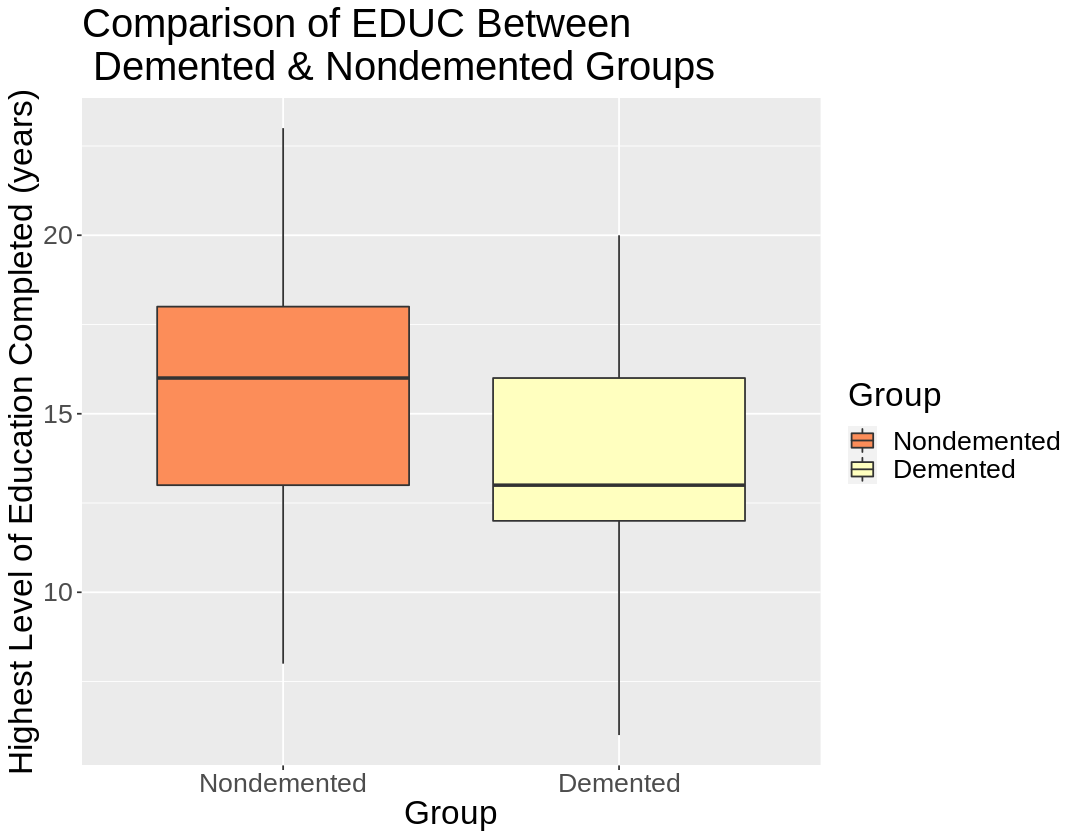

In [9]:
options(repr.plot.width = 9)

education_boxplot <- dementia |>
                     ggplot(aes(x = Group, y = EDUC, fill = Group)) + 
                     geom_boxplot(outlier.size = 2) +
                     theme(text = element_text(size = 20)) + 
                     labs(y = "Highest Level of Education Completed (years)")+
                     ggtitle("Comparison of EDUC Between \n Demented & Nondemented Groups")

education_boxplot + scale_fill_brewer(palette = "RdYlBu")

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


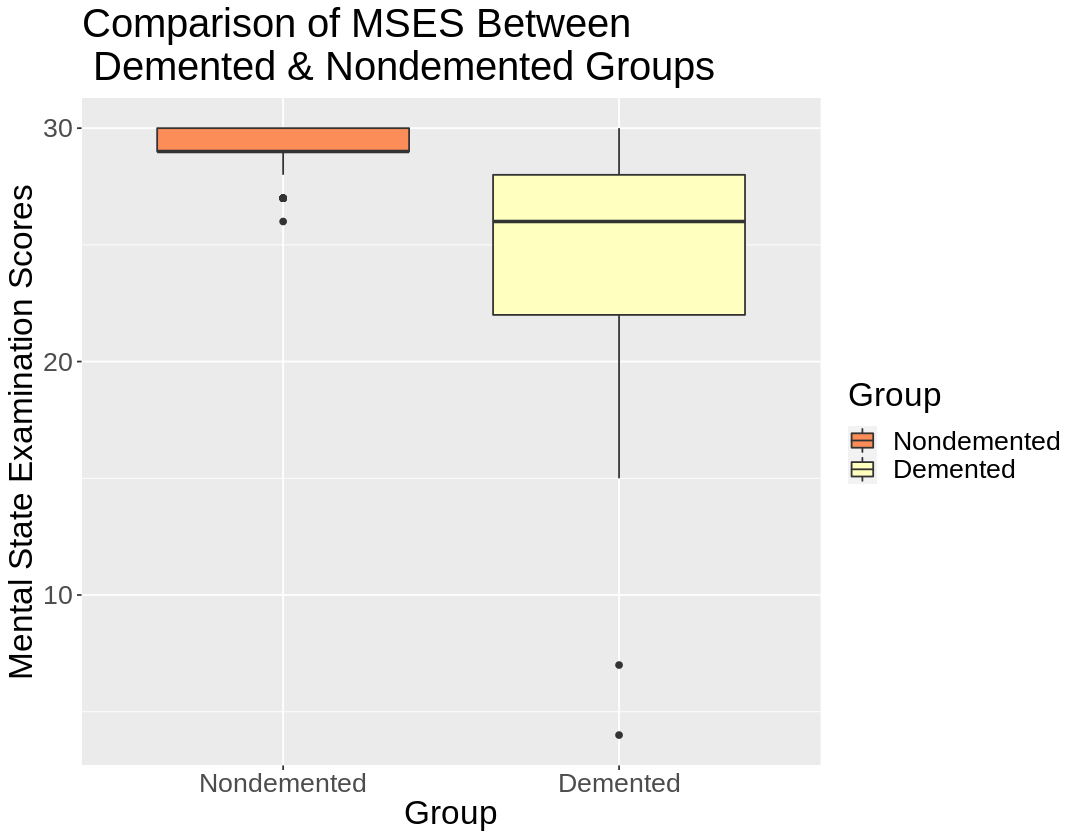

In [10]:
options(repr.plot.width = 9)

MMSE_boxplot <- dementia |>
                     ggplot(aes(x = Group, y = MMSE, fill = Group)) + 
                     geom_boxplot() +
                     theme(text = element_text(size = 20)) + 
                     labs(y = "Mental State Examination Scores")+
                     ggtitle("Comparison of MSES Between \n Demented & Nondemented Groups")

MMSE_boxplot + scale_fill_brewer(palette = "RdYlBu")

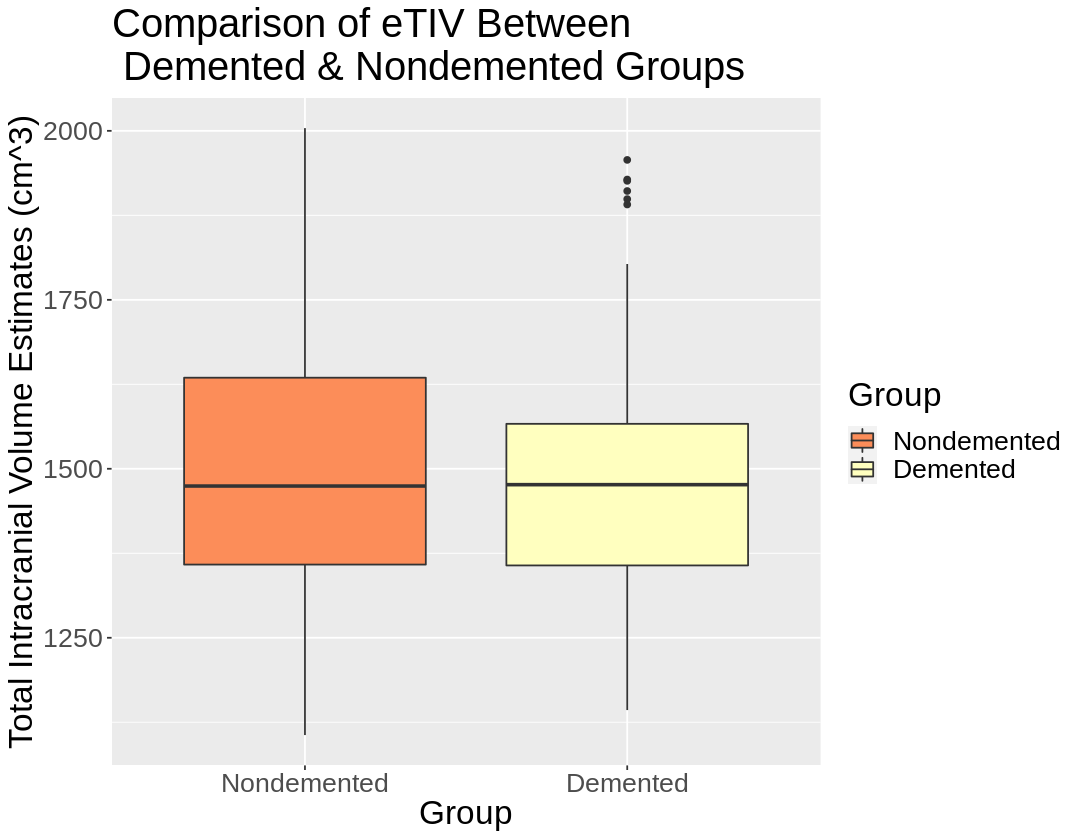

In [11]:
options(repr.plot.width = 9)

eTIV_boxplot <- dementia |>
                     ggplot(aes(x = Group, y = eTIV, fill = Group)) + 
                     geom_boxplot() +
                     theme(text = element_text(size = 20)) + 
                     labs(y = "Total Intracranial Volume Estimates (cm^3)")+
                     ggtitle("Comparison of eTIV Between \n Demented & Nondemented Groups")

eTIV_boxplot + scale_fill_brewer(palette = "RdYlBu")

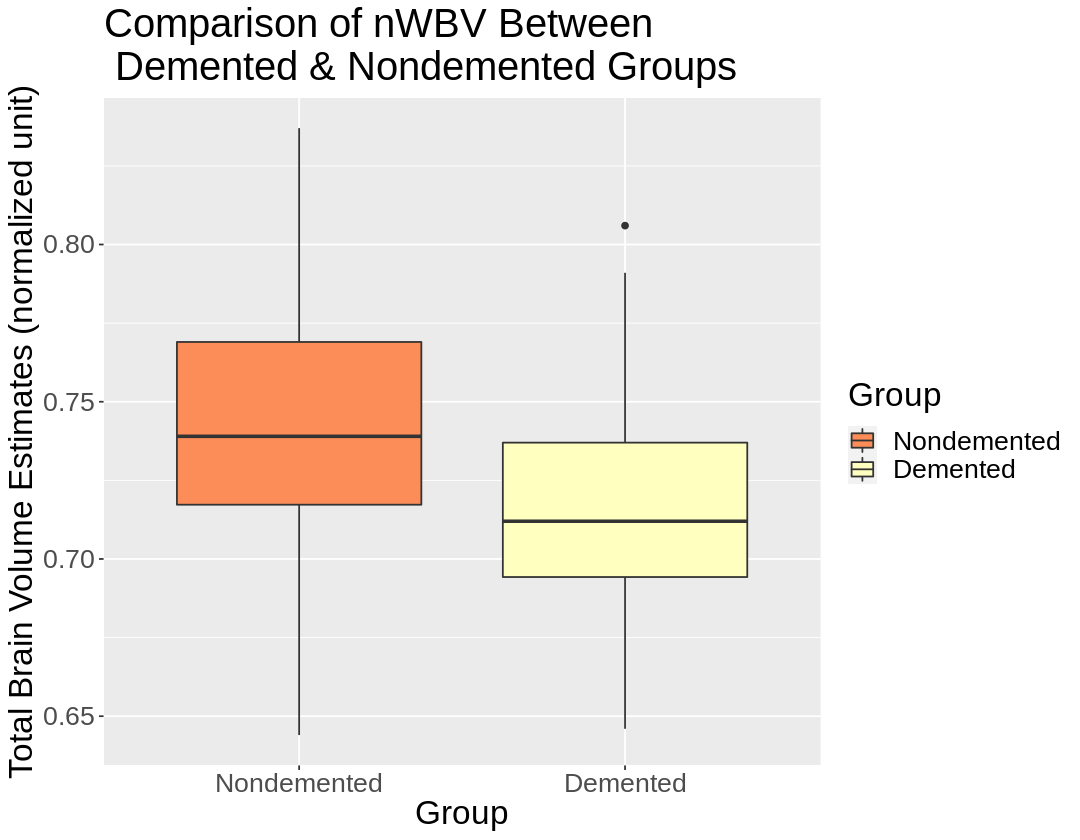

In [12]:
options(repr.plot.width = 9)

nWBV_boxplot <- dementia |>
                     ggplot(aes(x = Group, y = nWBV, fill = Group)) + 
                     geom_boxplot() +
                     theme(text = element_text(size = 20)) + 
                     labs(y = "Total Brain Volume Estimates (normalized unit)")+
                     ggtitle("Comparison of nWBV Between \n Demented & Nondemented Groups")
 
nWBV_boxplot + scale_fill_brewer(palette = "RdYlBu")

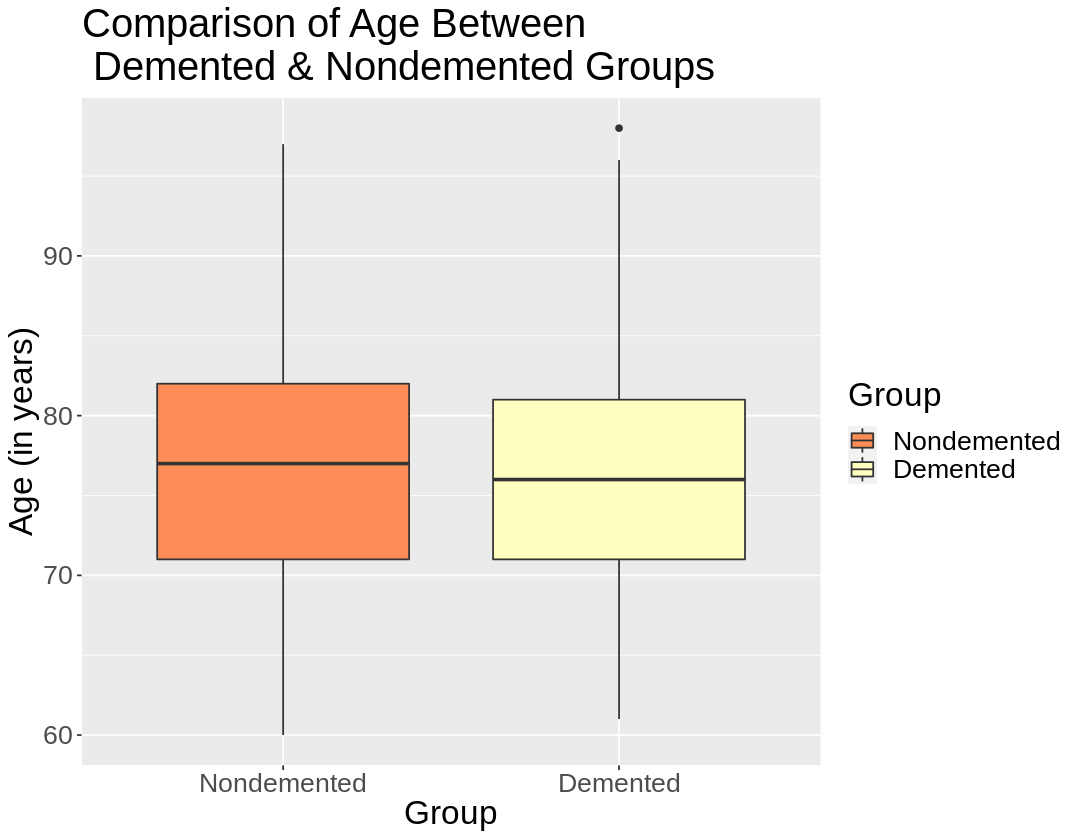

In [13]:
options(repr.plot.width = 9)

Age_boxplot <- dementia |>
                     ggplot(aes(x = Group, y = Age, fill = Group)) + 
                     geom_boxplot() +
                     theme(text = element_text(size = 20)) + 
                     labs(y = "Age (in years)")+
                     ggtitle("Comparison of Age Between \n Demented & Nondemented Groups")

Age_boxplot + scale_fill_brewer(palette = "RdYlBu")

### Methods:

Advised by the boxplots in the preliminary analysis, we will select columns EDU, MMSE and nWBV for the final analysis. Although previous studies have suggested older age’s link to dementia, age does not appear to vary across the two groups, meaning age may be a weak predictor. To attain data reproducibility, we set the seed to 1. We will use the K-nearest neighbors algorithm to build a classifier for dementia state prediction. The initial data set will be split into a training and test set, followed by cross-validation (with 10 folds) on the training set. We then specify the model specifications and recipe for the nearest neighbors before creating a workflow to plot the K vs. accuracy plot to select the highest accurate K-value. We will then make a new model specification with the most optimal K to evaluate our test set. Finally, after creating a tibble of the test set, we can anaylze the accuracy of our model for the test set.

#### Visualizations to be Used in Final Analysis
We use a K-nearest neighbor algorithm 3D scatter plot to visualise all 3 predictor variables, with the colouring of the plot being the target variable, Group. We will also have a red data point that signifies any new observation to clearly examine its closest data points.

### Expected Outcome and Significance

- Expected Findings
We expect to find that if an individual is above the age of 60 with a high mini-mental state exam score, education level, and total brain volume, they will likely be classified as non-demented. Similarly, an individual with a low mental state exam score and low total brain volume will likely be classified into the demented group.

- Expected Impact of Findings
Our analysis could have important implications for dementia diagnosis and treatment. Given that there is no definitive diagnosis for Alzheimer’s, our findings can help predict onsets of dementia by leveraging information from brain imaging, cost-efficient mental exams, and education level.

- Future Questions
If our predictive model for Alzheimer’s disease could attain a high level of accuracy using the chosen predictors, similar predictors may be used to predict other neurodegenerative diseases for different age groups.